R squared: 94.83
Mean Absolute Error: 4.5
Mean Square Error: 23.856249510467997
Root Mean Square Error: 4.884285977547588


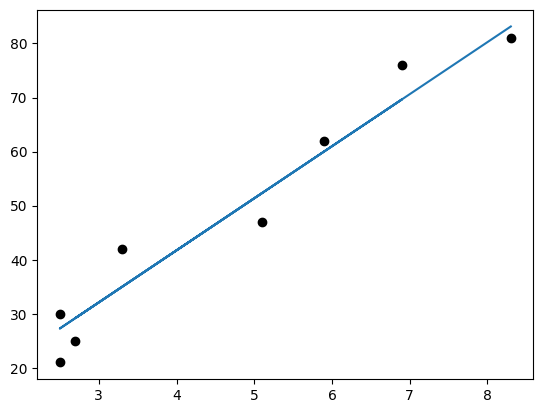

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('score.csv')

from sklearn.model_selection import train_test_split

X=df[['Hours']]
y=df['Scores']

x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_regression = Ridge() 
parameters= {'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
ridgecv =GridSearchCV(ridge_regression,parameters,scoring='neg_mean_squared_error',cv=5) 
ridgecv.fit(x_train,y_train) # find best alpha value and also train model
ridge_predict = ridgecv.predict(x_test) 

plt.scatter(x_test,y_test,color='black')
plt.plot(x_test,ridge_predict)

from sklearn import metrics
from sklearn.metrics import r2_score
meanAbErr = metrics.mean_absolute_error(y_test, ridge_predict)
meanSqErr = metrics.mean_squared_error(y_test, ridge_predict)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, ridge_predict))
print('R squared: {:.2f}'.format(r2_score(y_test, ridge_predict)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

